## Classification
- Step 0: Training-validation data split
- Step 1: Data analysis
- **Step 2: Classification**
	- Clean and pre-process data
	- Fit classifiers on training data set
	- Compare performance (in-sample, CV, out-of-sample)
	- Model selection and stacking
	- Write a Kaggle submission
- Step 3: Summary

In [2]:
%matplotlib inline
# %matplotlib qt

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import modules.utilgen as utgen
import modules.model_framework.utilmodel as utmdl
import modules.model_framework.model as mdl
import modules.data_framework.data_pipeline as dtp
import itertools

% reload_ext autoreload
% autoreload 2


In [3]:
np.random.seed(42)
sns.set_style("whitegrid")

### Load the data
#### Load the testing and validation I data sets

In [4]:
dataPath = os.path.join('data', 'data_derived', 'train1.csv')
dataTPath = os.path.join('data', 'data_derived', 'train2.csv')
dataOr = pd.read_csv(dataPath, index_col=0)
dataTOr = pd.read_csv(dataTPath, index_col=0)
with utgen.printOptions(precision=2):
    print('---------- Original Data (Train) -----------')
    display(dataOr.sample(n=5))
    display(dataOr.describe())
    print('---------- Original Data (Validation I) -----------')
    display(dataTOr.sample(n=5))
    display(dataTOr.describe())

---------- Original Data (Train) -----------

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.00,1,0,36947,78.27,D20,C
866,1,2,"Bystrom, Mrs. (Karolina)",female,42.00,0,0,236852,13.00,NaN,S
22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.00,D56,S
250,0,2,"Carter, Rev. Ernest Courtenay",male,54.00,1,0,244252,26.00,NaN,S
593,0,3,"Elsbury, Mr. William James",male,47.00,0,0,A/5 3902,7.25,NaN,S


,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.00,623.00,505.00,623.00,623.00,623.00
mean,0.40,2.31,29.27,0.53,0.37,31.79
std,0.49,0.83,14.07,1.06,0.79,46.40
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.90
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,30.70
max,1.00,3.00,80.00,8.00,5.00,512.33


---------- Original Data (Validation I) -----------

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
389,0,3,"Sadlier, Mr. Matthew",male,nan,0,0,367655,7.73,NaN,Q
483,0,3,"Rouse, Mr. Richard Henry",male,50.00,0,0,A/5 3594,8.05,NaN,S
65,0,1,"Stewart, Mr. Albert A",male,nan,0,0,PC 17605,27.72,NaN,C
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.00,0,0,17465,25.93,D17,S
200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.00,0,0,248747,13.00,NaN,S


,Survived,Pclass,Age,SibSp,Parch,Fare
count,268.00,268.00,209.00,268.00,268.00,268.00
mean,0.34,2.31,30.75,0.51,0.40,33.16
std,0.47,0.85,15.56,1.20,0.85,56.70
min,0.00,1.00,0.92,0.00,0.00,0.00
25%,0.00,1.75,21.00,0.00,0.00,7.92
50%,0.00,3.00,29.00,0.00,0.00,14.48
75%,1.00,3.00,39.00,1.00,0.00,33.63
max,1.00,3.00,74.00,8.00,6.00,512.33


#### Load the (testing + validation I) and validation II data sets

In [5]:
datafinPath = os.path.join('data', 'data_derived', 'train.csv')
datafinTPath = os.path.join('data', 'data_derived', 'test.csv')
submissionFolder = os.path.join('data', 'submission')
datafinOr = pd.read_csv(datafinPath, index_col=0)
datafinTOr = pd.read_csv(datafinTPath, index_col=0)
with utgen.printOptions(precision=2):
    print('---------- Original Data (Train + Validation I) -----------')
    display(datafinOr.sample(n=5))
    display(datafinOr.describe())
    print('---------- Original Data (Validation II) -----------')
    datafinTOr.insert(loc=0, column='Survived', value=0)
    display(datafinTOr.sample(n=5))
    display(datafinTOr.describe())

---------- Original Data (Train + Validation I) -----------

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
385,0,3,"Plotcharsky, Mr. Vasil",male,nan,0,0,349227,7.90,NaN,S
211,0,3,"Ali, Mr. Ahmed",male,24.00,0,0,SOTON/O.Q. 3101311,7.05,NaN,S
487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.00,1,0,19943,90.00,C93,S
426,0,3,"Wiseman, Mr. Phillippe",male,nan,0,0,A/4. 34244,7.25,NaN,S
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,0,1,392091,9.35,NaN,S


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


---------- Original Data (Validation II) -----------

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1103,0,3,"Finoli, Mr. Luigi",male,nan,0,0,SOTON/O.Q. 3101308,7.05,NaN,S
1003,0,3,"Shine, Miss. Ellen Natalia",female,nan,0,0,330968,7.78,NaN,Q
1145,0,3,"Salander, Mr. Karl Johan",male,24.00,0,0,7266,9.32,NaN,S
923,0,2,"Jefferys, Mr. Clifford Thomas",male,24.00,2,0,C.A. 31029,31.50,NaN,S
1028,0,3,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.22,NaN,C


,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,0.00,2.27,30.27,0.45,0.39,35.63
std,0.00,0.84,14.18,0.90,0.98,55.91
min,0.00,1.00,0.17,0.00,0.00,0.00
25%,0.00,1.00,21.00,0.00,0.00,7.90
50%,0.00,3.00,27.00,0.00,0.00,14.45
75%,0.00,3.00,39.00,1.00,0.00,31.50
max,0.00,3.00,76.00,8.00,9.00,512.33


#### Clean and transform the data (example)

In [6]:
version = 7
with utgen.printOptions(precision=2):
    data, dataT = dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)
    print('---------- Clean Data (Train) -----------')
    display(data.sample(n=5))
    print('---------- Clean Data (Validation I) -----------')
    display(dataT.sample(n=5))
    
    datafin, datafinT = dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version)
    # datafinT.Survived = np.nan
    print('---------- Clean Data (Train + Validation I) -----------')
    display(datafin.sample(n=5))
    print('---------- Clean Data (Validation II) -----------')
    display(datafinT.sample(n=5))
    print('---------- dtypes -----------')
    display(pd.DataFrame([data.dtypes, dataT.dtypes, datafin.dtypes, datafinT.dtypes],
                         index=['Train','Val I','Train + Val I','Val II']))

---------- Clean Data (Train) -----------

,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
PassengerId,,,,,,,,,,,,,,
143,1,3,24.00,1,0,15.85,0,1,1,1,0,0,0,0
406,0,2,34.00,1,0,21.00,0,1,0,1,0,0,0,0
890,1,1,26.00,0,0,30.00,1,0,0,0,0,0,0,0
764,1,1,36.00,1,2,120.00,0,1,1,0,0,0,0,0
22,1,2,34.00,0,0,13.00,0,1,0,0,0,0,0,0


---------- Clean Data (Validation I) -----------

,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
PassengerId,,,,,,,,,,,,,,
747,0,3,16.00,1,1,20.25,0,1,0,1,0,0,0,0
403,0,3,21.00,1,0,9.82,0,1,1,1,0,0,1,0
102,0,3,28.68,0,0,7.90,0,1,0,1,1,0,0,0
751,1,2,4.00,1,1,23.00,0,1,1,1,0,0,1,0
389,0,3,29.14,0,0,7.73,0,0,0,1,1,0,0,0


---------- Clean Data (Train + Validation I) -----------

,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
PassengerId,,,,,,,,,,,,,,
2,1,1,38.00,1,0,71.28,1,0,1,0,0,0,0,0
650,1,3,23.00,0,0,7.55,0,1,1,1,0,0,1,0
464,0,2,48.00,0,0,13.00,0,1,0,1,0,0,0,0
328,1,2,36.00,0,0,13.00,0,1,1,0,0,0,0,0
396,0,3,22.00,0,0,7.80,0,1,0,1,0,0,0,0


---------- Clean Data (Validation II) -----------

,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
PassengerId,,,,,,,,,,,,,,
963,0,3,21.00,0,0,7.90,0,1,0,1,0,0,0,0
935,0,2,30.00,0,0,13.00,0,1,1,1,0,0,0,0
922,0,2,50.00,1,0,26.00,0,1,0,1,0,0,0,0
1006,0,1,63.00,1,0,169.73,0,1,1,0,0,0,0,0
981,0,2,2.00,1,1,23.00,0,1,0,1,0,1,0,0


---------- dtypes -----------

,Survived,Pclass,Age,SibSp,Parch,Fare,EmbarkedC,EmbarkedS,Female,CabinNan,AgeNan,TitleMaster,TitleMiss,TitleRare
Train,int64,int64,float64,int64,int64,float64,int8,int8,int8,int8,int8,int8,int8,int8
Val I,int64,int64,float64,int64,int64,float64,int8,int8,int8,int8,int8,int8,int8,int8
Train + Val I,int64,int64,float64,int64,int64,float64,int8,int8,int8,int8,int8,int8,int8,int8
Val II,int64,int64,float64,int64,int64,float64,int8,int8,int8,int8,int8,int8,int8,int8


###Classifiers
- We train and test several classifiers using the same data.
- To estimate performance, the following statistics are generally available:
	- 'accuracy' = Accuracy; this is the statistic used in the Kaggle competition
	- 'logproba' = Log Likelihood; probability output is not available for all classifiers - generally, some kind of proxy is used
	- 'aucproba' = AUC (Area Under the Curve)
	- 'recall' = Recall
	- 'precision' = Precision
- The performance statistics are shown as < IS / CV (Std) / OOS >, where:
	- IS = In-Sample
	- CV = Cross-Validated
	- Std = Standard deviation computed across the CV samples
	- OOS = Out-Of-Sample
- Also, the following statistics are available:
	- Confusion matrix
	- ROC curve
- Additional information about may be shown for some classifiers

####Logistic
- Important features: Female, TitleMaster, Embarked, CabinNan, Pclass
- Importance of Female is expected, but it is surprising to see Ebarked so high in the list
- TitleMiss is negative, however, it becomes positive when Female is removed => married women have better chances to survive
- Adding synthetic features noticeably improves performance

In [6]:
# import cProfile
# cProfile.run('modelLR.fit(data)')

-- Data pipeline v. 7 --

****** LOGISTIC ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.83 / 0.82 (0.03) / 0.83

logproba	 (IS / CV / OOS): -0.42 / -0.44 (0.03) / -0.43

aucproba	 (IS / CV / OOS): 0.88 / 0.87 (0.01) / 0.84

recall	 (IS / CV / OOS): 0.77 / 0.75 (0.03) / 0.71

precision	 (IS / CV / OOS): 0.79 / 0.79 (0.05) / 0.76

-----Confusion (IS)-----

   0-pred  1-pred
0    0.52    0.08
1    0.09    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.59    0.07
1    0.10    0.24

-----Coefficients-----

Pclass        -0.85
Age           -0.44
SibSp         -0.31
Parch         -0.11
Fare          -0.16
EmbarkedC     -0.63
EmbarkedS     -1.14
Female         3.08
CabinNan      -0.84
AgeNan        -0.24
TitleMaster    2.06
TitleMiss     -0.59
TitleRare     -0.05
dtype: float64

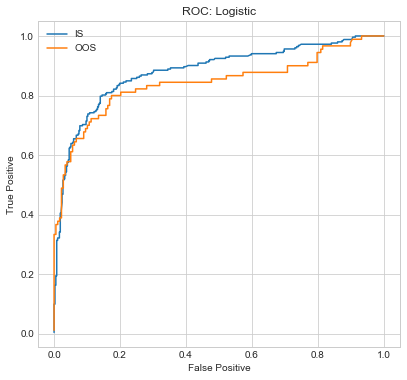

In [7]:
np.random.seed(42)
version = 7
modelLR = mdl.Logistic(scale='some', fit_intercept=False, C=1)
modelLR.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelLR.printPlotSummary()
submission = modelLR.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}_C{}.csv".format(modelLR.name, version, 
                                                                                    modelLR.C)), index_label='PassengerId')


####Logistic Ridge CV
- The results are very similar to vanilla Logistic Regression

-- Data pipeline v. 7 --

****** LOGISTIC RIDGE ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.83 / 0.82 (0.02) / 0.84

logproba	 (IS / CV / OOS): -0.41 / -0.44 (0.03) / -0.43

aucproba	 (IS / CV / OOS): 0.88 / 0.87 (0.02) / 0.84

recall	 (IS / CV / OOS): 0.79 / 0.75 (0.02) / 0.72

precision	 (IS / CV / OOS): 0.80 / 0.79 (0.04) / 0.77

-----Confusion (IS)-----

   0-pred  1-pred
0    0.51    0.08
1    0.09    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.59    0.07
1    0.09    0.24

-----Coefficients-----

Pclass        -0.91
Age           -0.45
SibSp         -0.37
Parch         -0.18
Fare          -0.17
EmbarkedC     -0.81
EmbarkedS     -1.32
Female         3.61
CabinNan      -0.87
AgeNan        -0.25
TitleMaster    2.79
TitleMiss     -0.92
TitleRare     -0.02
dtype: float64

-----Ridge CV multiplier-----

Ridge Multiplier (inverse reg. strength) = 16.00

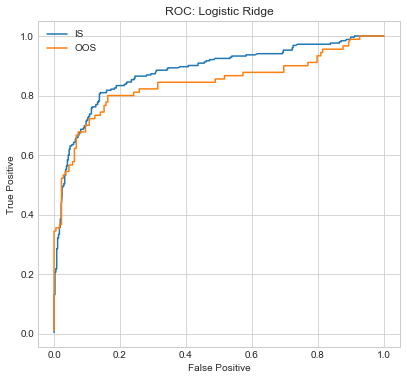

In [8]:
np.random.seed(42)
version = 7
modelLRRidgeCV = mdl.LogisticRidgeCV(fit_intercept=False, scale='some', Cs=np.exp2(np.arange(-8, 9, 1)))
modelLRRidgeCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelLRRidgeCV.printPlotSummary()
submission = modelLRRidgeCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelLRRidgeCV.name, version)), index_label='PassengerId')

####Logistic Best Subset
- Selected features: Female, Pclass, Fare, EmbarkedS, CabinNan, TitleMiss

-- Data pipeline v. 7 --

****** LOGISTIC KBEST ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.78 / 0.78 (0.03) / 0.78

logproba	 (IS / CV / OOS): -0.46 / -0.47 (0.03) / -0.46

aucproba	 (IS / CV / OOS): 0.85 / 0.84 (0.02) / 0.82

recall	 (IS / CV / OOS): 0.77 / 0.76 (0.04) / 0.74

precision	 (IS / CV / OOS): 0.71 / 0.71 (0.05) / 0.65

-----Confusion (IS)-----

   0-pred  1-pred
0    0.47    0.13
1    0.09    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.13
1    0.09    0.25

-----Coefficients-----

Pclass      -0.56
Fare        -0.20
EmbarkedS   -0.76
Female       2.51
CabinNan    -1.06
TitleMiss   -0.12
dtype: float64

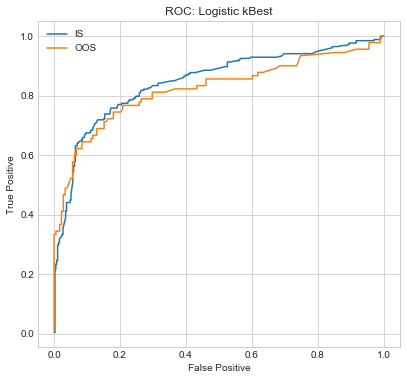

In [9]:
np.random.seed(42)
version = 7
modelLRBestK = mdl.LogisticBestSubset(fit_intercept=False, scale='some', k=6, C=1, selectfun='f_classif')
modelLRBestK.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelLRBestK.printPlotSummary()
submission = modelLRBestK.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelLRBestK.name, version)), index_label='PassengerId')

####Logistic GAM
- Important features: Female, TitleMaster, Pclass, SibSp, EmbarkedS
- Confirmation of data analysis: the youngest have better chances to survive
- AgeNaN plot shows a flat line => Age values are missing at random
- Fare has a "bump" in the middle, Pclass does not (cf. data analysis)
- Adding synthetic features improves performance, although less then for Logistic Regression
- Without synthetic features, Age is important as well

-- Data pipeline v. 7 --

****** LOGISTIC GAM ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.83 / 0.81 (0.03) / 0.81

logproba	 (IS / CV / OOS): -0.41 / -0.45 (0.04) / -0.44

aucproba	 (IS / CV / OOS): 0.89 / 0.87 (0.02) / 0.83

recall	 (IS / CV / OOS): 0.77 / 0.72 (0.03) / 0.64

precision	 (IS / CV / OOS): 0.80 / 0.79 (0.06) / 0.74

-----Confusion (IS)-----

   0-pred  1-pred
0    0.52    0.08
1    0.09    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.59    0.07
1    0.12    0.22

-----Statistics-----

Feature Function   Data Type      Num Splines   Spline Order  Linear Fit  Lambda     P > x      Sig. Code 
================== ============== ============= ============= =========== ========== ========== ==========
Pclass_________    numerical      15            3             False       5.0        7.90e-04   ***       
Age____________    numerical      15            3             False       5.0        6.50e-02   .         
SibSp__________    numerical      15            3             False       5.0        6.93e-03   **        
Parch__________    numerical      15            3             False       5.0        9.71e-01             
Fare___________    numerical      15            3             False       5.0        8.94e-02   .         
EmbarkedC______    categorical    2             0             False       5.0        8.86e-01             
EmbarkedS______    categorical    2             0             False       5.0        1.23e-01             
Female_________    categorical    2  

Significance codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


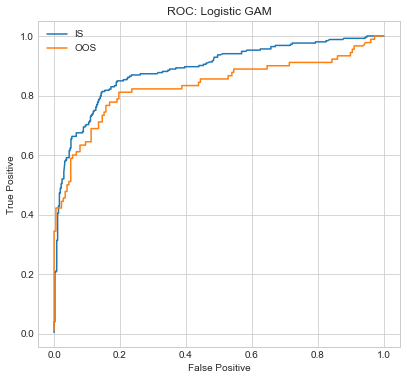

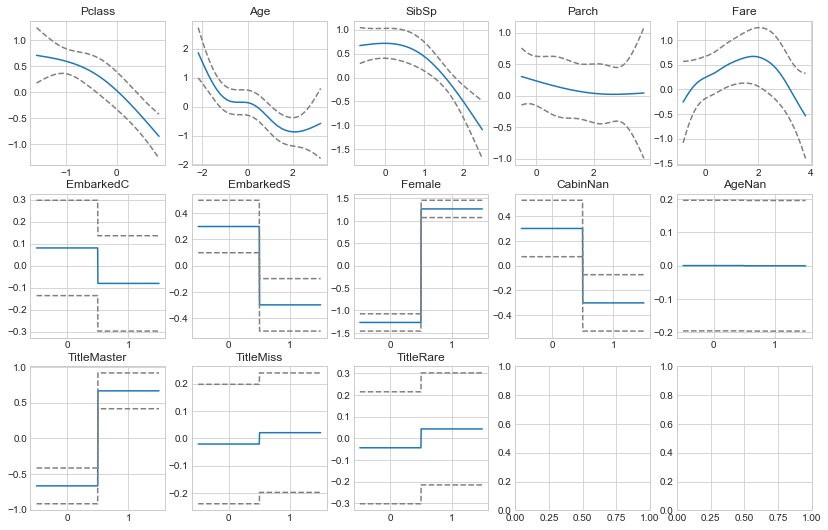

In [7]:
np.random.seed(42)
version = 7
modelGAM = mdl.LogisticGAM(scale='some', fit_intercept=False, n_splines=15, lam=5)
modelGAM.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelGAM.printPlotSummary()
submission = modelGAM.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelGAM.name, version)), index_label='PassengerId')

####Logistic GAM CV
- CV gives an overall stronger regularization
- CV shows a slightly better performance

-- Data pipeline v. 7 --

****** LOGISTIC GAM CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.83 / 0.81 (0.03) / 0.82

logproba	 (IS / CV / OOS): -0.41 / -0.45 (0.04) / -0.42

aucproba	 (IS / CV / OOS): 0.88 / 0.87 (0.02) / 0.84

recall	 (IS / CV / OOS): 0.78 / 0.75 (0.05) / 0.69

precision	 (IS / CV / OOS): 0.80 / 0.78 (0.05) / 0.76

-----Confusion (IS)-----

   0-pred  1-pred
0    0.52    0.08
1    0.09    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.59    0.07
1    0.10    0.23

-----Statistics-----

Feature Function   Data Type      Num Splines   Spline Order  Linear Fit  Lambda     P > x      Sig. Code 
================== ============== ============= ============= =========== ========== ========== ==========
Pclass_________    numerical      4             3             False       0.25       4.01e-06   ***       
Age____________    numerical      4             3             False       0.25       8.69e-02   .         
SibSp__________    numerical      4             3             False       0.25       5.83e-03   **        
Parch__________    numerical      4             3             False       0.25       6.92e-01             
Fare___________    numerical      4             3             False       0.25       3.62e-01             
EmbarkedC______    categorical    2             0             False       0.25       8.28e-01             
EmbarkedS______    categorical    2             0             False       0.25       1.62e-01             
Female_________    categorical    2  

Significance codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

-----Best CV Parameters-----

n_splines = 4.00

lam = 0.25

...with the score = 0.83   | avg = 0.81, std = 0.01

D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


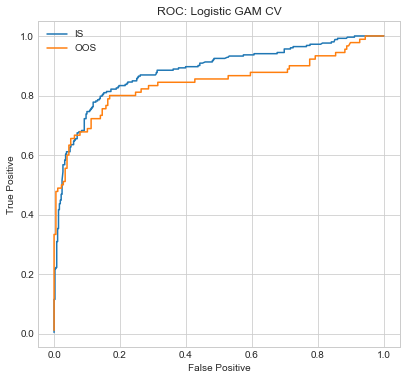

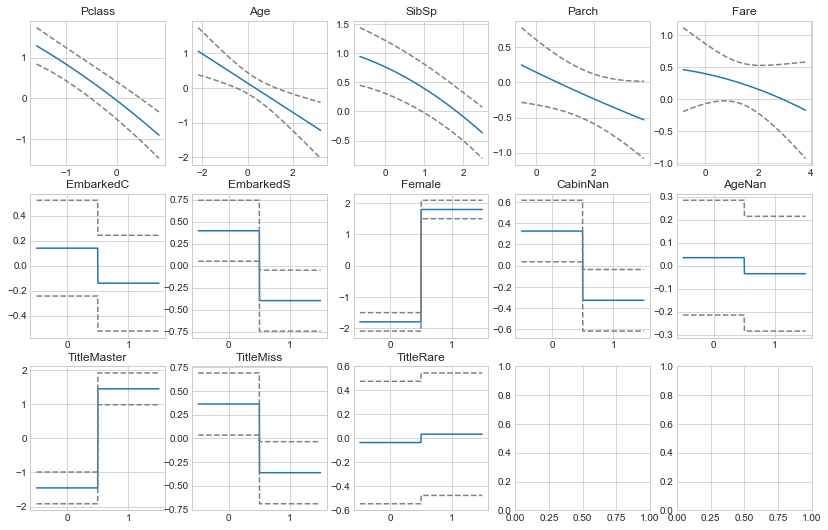

In [10]:
np.random.seed(42)
version = 7
modelGAMCV = mdl.genModelCV(mdl.LogisticGAM, cv=5, grid={'n_splines': np.exp2(np.arange(2, 6)), 'lam': np.exp2(np.arange(-4, 5, 2))})\
    (scale='some', fit_intercept=False)
modelGAMCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelGAMCV.printPlotSummary()
submission = modelGAMCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelGAMCV.name, version)), index_label='PassengerId')

####Linear Local

-- Data pipeline v. 7 --

****** LOGISTIC LOCAL (LINEAR PROXY) ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.88 / 0.80 (0.03) / 0.84

logproba	 (IS / CV / OOS): -0.46 / -0.52 (0.02) / -0.51

aucproba	 (IS / CV / OOS): 0.94 / 0.85 (0.02) / 0.84

recall	 (IS / CV / OOS): 0.81 / 0.70 (0.03) / 0.68

precision	 (IS / CV / OOS): 0.89 / 0.78 (0.06) / 0.80

-----Confusion (IS)-----

   0-pred  1-pred
0    0.56    0.04
1    0.08    0.33

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.61    0.06
1    0.11    0.23

D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


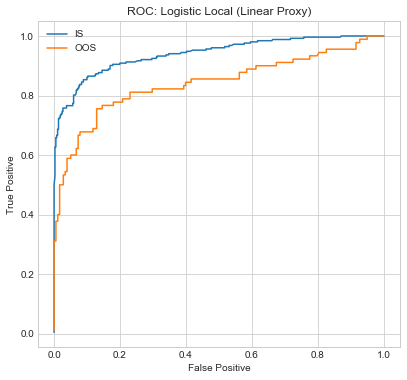

In [15]:
np.random.seed(42)
version = 7
modelLocal = mdl.LogisticLinearLocal(scale='some', reg_type='ll', bw=1.)
modelLocal.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelLocal.printPlotSummary()
submission = modelLocal.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelLocal.name, version)), index_label='PassengerId')


####Linear Local CV
- CV gives a rather strong regularization - similar to GAM CV

-- Data pipeline v. 7 --

****** LOGISTIC LOCAL (LINEAR PROXY) CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.84 / 0.83 (0.04) / 0.82

logproba	 (IS / CV / OOS): -0.51 / -0.52 (0.02) / -0.52

aucproba	 (IS / CV / OOS): 0.89 / 0.87 (0.02) / 0.84

recall	 (IS / CV / OOS): 0.77 / 0.75 (0.05) / 0.68

precision	 (IS / CV / OOS): 0.82 / 0.81 (0.06) / 0.75

-----Confusion (IS)-----

   0-pred  1-pred
0    0.52    0.07
1    0.09    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.59    0.07
1    0.11    0.23

-----Best CV Parameters-----

bw = 4.00

...with the score = 0.83   | avg = 0.77, std = 0.04

D:\SoftwareWork\PythonProjects\Miniconda\envs\datascience1\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


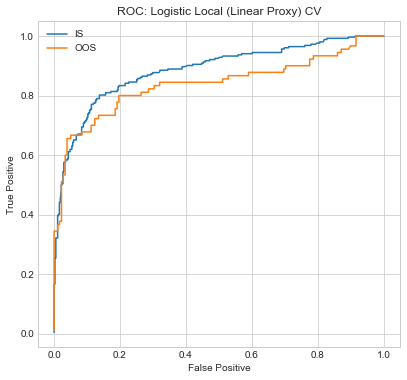

In [17]:
np.random.seed(42)
version = 7
modelLocal = mdl.genModelCV(mdl.LogisticLinearLocal, cv=5, grid={'bw':np.exp2(np.arange(-3, 3))})\
    (scale='some', reg_type='ll')
modelLocal.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelLocal.printPlotSummary()
submission = modelLocal.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelLocal.name, version)), index_label='PassengerId')


### Logistic Bayes

In [40]:
modelLogisticBayesian = mdl.LogisticBayesian(scale=True, featuresSd=10, nsamplesFit=200, nsamplesPredict=200,
                                             mcmc=True, nsampleTune=200, discardTuned=True,
                                             samplerStep=None, samplerInit='advi')
modelLogisticBayesian.fit(datafinOr)
modelLogisticBayesian.predict(datafinTOr)
modelLogisticBayesian.printPlotSummary()
modelLogisticBayesian.plotTrace()


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 639.55:   4%|▍         | 411/10000 [00:00<00:02, 4104.99it/s]

Average Loss = 608.83:   8%|▊         | 790/10000 [00:00<00:02, 4003.97it/s]

Average Loss = 578.09:  12%|█▏        | 1181/10000 [00:00<00:02, 3971.89it/s]

Average Loss = 541.76:  16%|█▌        | 1579/10000 [00:00<00:02, 3972.52it/s]

Average Loss = 506.35:  20%|█▉        | 1977/10000 [00:00<00:02, 3974.35it/s]

Average Loss = 478.89:  24%|██▍       | 2387/10000 [00:00<00:01, 4009.59it/s]

Average Loss = 454.53:  28%|██▊       | 2809/10000 [00:00<00:01, 4070.35it/s]

Average Loss = 434.15:  32%|███▏      | 3226/10000 [00:00<00:01, 4097.38it/s]

Average Loss = 417.2:  36%|███▋      | 3644/10000 [00:00<00:01, 4119.64it/s] 

Average Loss = 404.36:  41%|████      | 4062/10000 [00:01<00:01, 4135.22it/s]

Average Loss = 393.62:  45%|████▍     | 4491/10000 [00:01<00:01, 4179.18it/s]

Average Loss = 383.54:  49%|████▉     | 4912/10000 [00:01<00:01, 4186.57it/s]

Average Loss = 375.17:  53%|█████▎    | 5333/10000 [00:01<00:01, 4193.03it/s]

Average Loss = 368.8:  58%|█████▊    | 5753/10000 [00:01<00:01, 4193.46it/s] 

Average Loss = 364.72:  62%|██████▏   | 6170/10000 [00:01<00:00, 4153.29it/s]

Average Loss = 360.97:  66%|██████▌   | 6596/10000 [00:01<00:00, 4181.41it/s]

Average Loss = 356.46:  70%|███████   | 7024/10000 [00:01<00:00, 4210.24it/s]

Average Loss = 353.24:  74%|███████▍  | 7447/10000 [00:01<00:00, 4213.98it/s]

Average Loss = 350.56:  79%|███████▊  | 7868/10000 [00:01<00:00, 4182.28it/s]

Average Loss = 348.94:  83%|████████▎ | 8286/10000 [00:02<00:00, 4123.97it/s]

Average Loss = 347.29:  87%|████████▋ | 8714/10000 [00:02<00:00, 4168.87it/s]

Average Loss = 346.02:  91%|█████████▏| 9137/10000 [00:02<00:00, 4185.97it/s]

Average Loss = 345.09:  96%|█████████▌| 9556/10000 [00:02<00:00, 4175.51it/s]

Average Loss = 344.11: 100%|█████████▉| 9975/10000 [00:02<00:00, 4178.49it/s]

Average Loss = 344.06: 100%|██████████| 10000/10000 [00:02<00:00, 4130.81it/s]


Finished [100%]: Average Loss = 344.02


****** LOGISTIC BAYESIAN ******

-----Train and Test Sets-----
Sample Size (Train / Test): 623 / 268
Survived Rate (Train / Test): 0.37 / 0.41



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 506.25:   5%|▍         | 472/10000 [00:00<00:02, 4716.80it/s]

Average Loss = 483.63:   9%|▉         | 917/10000 [00:00<00:01, 4633.45it/s]

Average Loss = 442.93:  14%|█▍        | 1382/10000 [00:00<00:01, 4637.71it/s]

Average Loss = 417.62:  18%|█▊        | 1829/10000 [00:00<00:01, 4585.44it/s]

Average Loss = 392.99:  23%|██▎       | 2279/10000 [00:00<00:01, 4558.07it/s]

Average Loss = 373.16:  27%|██▋       | 2731/10000 [00:00<00:01, 4544.96it/s]

Average Loss = 358.34:  32%|███▏      | 3175/10000 [00:00<00:01, 4511.86it/s]

Average Loss = 340.38:  36%|███▋      | 3630/10000 [00:00<00:01, 4521.90it/s]

Average Loss = 326.93:  41%|████      | 4080/10000 [00:00<00:01, 4515.06it/s]

Average Loss = 318.16:  45%|████▌     | 4529/10000 [00:01<00:01, 4506.28it/s]

Average Loss = 311.65:  50%|████▉     | 4988/10000 [00:01<00:01, 4529.98it/s]

Average Loss = 304.61:  54%|█████▍    | 5432/10000 [00:01<00:01, 4472.21it/s]

Average Loss = 299.83:  59%|█████▉    | 5909/10000 [00:01<00:00, 4555.47it/s]

Average Loss = 295.68:  64%|██████▎   | 6370/10000 [00:01<00:00, 4570.52it/s]

Average Loss = 292.46:  68%|██████▊   | 6840/10000 [00:01<00:00, 4607.78it/s]

Average Loss = 289.92:  73%|███████▎  | 7309/10000 [00:01<00:00, 4630.61it/s]

Average Loss = 287.51:  78%|███████▊  | 7771/10000 [00:01<00:00, 4546.98it/s]

Average Loss = 286.02:  82%|████████▏ | 8226/10000 [00:01<00:00, 4374.39it/s]

Average Loss = 284.7:  87%|████████▋ | 8665/10000 [00:01<00:00, 4345.13it/s] 

Average Loss = 283.56:  91%|█████████ | 9101/10000 [00:02<00:00, 4238.01it/s]

Average Loss = 282.59:  95%|█████████▌| 9526/10000 [00:02<00:00, 4204.73it/s]

Average Loss = 281.92:  99%|█████████▉| 9948/10000 [00:02<00:00, 4184.18it/s]

Average Loss = 281.84: 100%|██████████| 10000/10000 [00:02<00:00, 4433.79it/s]


Finished [100%]: Average Loss = 281.82


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 512.36:   5%|▍         | 493/10000 [00:00<00:01, 4925.08it/s]

Average Loss = 489.52:  10%|▉         | 957/10000 [00:00<00:01, 4833.60it/s]

Average Loss = 448.83:  14%|█▍        | 1422/10000 [00:00<00:01, 4775.13it/s]

Average Loss = 418.9:  19%|█▉        | 1891/10000 [00:00<00:01, 4748.27it/s] 

Average Loss = 396.18:  24%|██▎       | 2361/10000 [00:00<00:01, 4731.30it/s]

Average Loss = 376.78:  28%|██▊       | 2833/10000 [00:00<00:01, 4725.69it/s]

Average Loss = 359.02:  33%|███▎      | 3303/10000 [00:00<00:01, 4716.64it/s]

Average Loss = 342.65:  38%|███▊      | 3772/10000 [00:00<00:01, 4706.33it/s]

Average Loss = 331.41:  42%|████▏     | 4239/10000 [00:00<00:01, 4694.49it/s]

Average Loss = 322.57:  47%|████▋     | 4707/10000 [00:01<00:01, 4690.09it/s]

Average Loss = 314.73:  52%|█████▏    | 5173/10000 [00:01<00:01, 4680.41it/s]

Average Loss = 307.92:  56%|█████▋    | 5646/10000 [00:01<00:00, 4694.76it/s]

Average Loss = 303.38:  61%|██████    | 6121/10000 [00:01<00:00, 4709.45it/s]

Average Loss = 298.93:  66%|██████▌   | 6595/10000 [00:01<00:00, 4716.76it/s]

Average Loss = 296:  71%|███████   | 7064/10000 [00:01<00:00, 4700.94it/s]   

Average Loss = 293.88:  75%|███████▌  | 7533/10000 [00:01<00:00, 4696.67it/s]

Average Loss = 291.98:  80%|████████  | 8004/10000 [00:01<00:00, 4698.37it/s]

Average Loss = 290.35:  85%|████████▍ | 8473/10000 [00:01<00:00, 4682.18it/s]

Average Loss = 288.92:  89%|████████▉ | 8945/10000 [00:01<00:00, 4690.63it/s]

Average Loss = 287.98:  94%|█████████▍| 9414/10000 [00:02<00:00, 4688.36it/s]

Average Loss = 286.74:  99%|█████████▉| 9890/10000 [00:02<00:00, 4707.62it/s]

Average Loss = 286.47: 100%|██████████| 10000/10000 [00:02<00:00, 4690.31it/s]


Finished [100%]: Average Loss = 286.44


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 502.31:   5%|▍         | 490/10000 [00:00<00:01, 4898.73it/s]

Average Loss = 484.43:  10%|▉         | 954/10000 [00:00<00:01, 4817.85it/s]

Average Loss = 443.41:  14%|█▍        | 1421/10000 [00:00<00:01, 4770.48it/s]

Average Loss = 406.7:  19%|█▉        | 1895/10000 [00:00<00:01, 4758.89it/s] 

Average Loss = 383.24:  24%|██▎       | 2354/10000 [00:00<00:01, 4705.79it/s]

Average Loss = 364.18:  28%|██▊       | 2833/10000 [00:00<00:01, 4729.80it/s]

Average Loss = 345.07:  33%|███▎      | 3302/10000 [00:00<00:01, 4716.67it/s]

Average Loss = 331.9:  38%|███▊      | 3759/10000 [00:00<00:01, 4664.75it/s] 

Average Loss = 321.45:  42%|████▏     | 4225/10000 [00:00<00:01, 4660.81it/s]

Average Loss = 311.15:  47%|████▋     | 4685/10000 [00:01<00:01, 4640.56it/s]

Average Loss = 303.26:  52%|█████▏    | 5160/10000 [00:01<00:01, 4671.53it/s]

Average Loss = 296.93:  56%|█████▋    | 5629/10000 [00:01<00:00, 4676.43it/s]

Average Loss = 291.09:  61%|██████    | 6096/10000 [00:01<00:00, 4671.92it/s]

Average Loss = 288.06:  66%|██████▌   | 6566/10000 [00:01<00:00, 4678.39it/s]

Average Loss = 284.68:  70%|███████   | 7031/10000 [00:01<00:00, 4598.02it/s]

Average Loss = 282.24:  75%|███████▍  | 7496/10000 [00:01<00:00, 4612.16it/s]

Average Loss = 280.67:  80%|███████▉  | 7956/10000 [00:01<00:00, 4588.67it/s]

Average Loss = 278.78:  84%|████████▍ | 8426/10000 [00:01<00:00, 4618.81it/s]

Average Loss = 277.19:  89%|████████▉ | 8891/10000 [00:01<00:00, 4626.52it/s]

Average Loss = 276.26:  94%|█████████▎| 9354/10000 [00:02<00:00, 4593.96it/s]

Average Loss = 275.38:  98%|█████████▊| 9832/10000 [00:02<00:00, 4644.46it/s]

Average Loss = 274.95: 100%|██████████| 10000/10000 [00:02<00:00, 4641.91it/s]


Finished [100%]: Average Loss = 274.94


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 508.66:   5%|▍         | 489/10000 [00:00<00:01, 4880.00it/s]

Average Loss = 484.87:  10%|▉         | 958/10000 [00:00<00:01, 4820.18it/s]

Average Loss = 443.49:  14%|█▍        | 1419/10000 [00:00<00:01, 4752.37it/s]

Average Loss = 411.84:  19%|█▉        | 1881/10000 [00:00<00:01, 4710.69it/s]

Average Loss = 385.88:  23%|██▎       | 2349/10000 [00:00<00:01, 4699.32it/s]

Average Loss = 362.23:  28%|██▊       | 2815/10000 [00:00<00:01, 4656.61it/s]

Average Loss = 346.73:  33%|███▎      | 3254/10000 [00:00<00:01, 4572.75it/s]

Average Loss = 331.95:  37%|███▋      | 3733/10000 [00:00<00:01, 4634.21it/s]

Average Loss = 321.63:  42%|████▏     | 4169/10000 [00:00<00:01, 4517.92it/s]

Average Loss = 313.13:  46%|████▌     | 4604/10000 [00:01<00:01, 4462.68it/s]

Average Loss = 305.19:  51%|█████     | 5066/10000 [00:01<00:01, 4508.52it/s]

Average Loss = 299.71:  55%|█████▌    | 5524/10000 [00:01<00:00, 4529.35it/s]

Average Loss = 295.42:  60%|█████▉    | 5992/10000 [00:01<00:00, 4572.79it/s]

Average Loss = 291.92:  65%|██████▍   | 6457/10000 [00:01<00:00, 4595.01it/s]

Average Loss = 289.21:  69%|██████▉   | 6914/10000 [00:01<00:00, 4510.16it/s]

Average Loss = 286.23:  74%|███████▍  | 7375/10000 [00:01<00:00, 4538.19it/s]

Average Loss = 284.61:  78%|███████▊  | 7828/10000 [00:01<00:00, 4504.80it/s]

Average Loss = 282.77:  83%|████████▎ | 8297/10000 [00:01<00:00, 4557.68it/s]

Average Loss = 281.24:  88%|████████▊ | 8759/10000 [00:01<00:00, 4575.00it/s]

Average Loss = 280.35:  92%|█████████▏| 9217/10000 [00:02<00:00, 4527.85it/s]

Average Loss = 279.42:  97%|█████████▋| 9672/10000 [00:02<00:00, 4532.07it/s]

Average Loss = 278.73: 100%|██████████| 10000/10000 [00:02<00:00, 4564.97it/s]


Finished [100%]: Average Loss = 278.69


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Loss = 500.97:   4%|▍         | 418/10000 [00:00<00:02, 4173.27it/s]

Average Loss = 485.28:   8%|▊         | 800/10000 [00:00<00:02, 4059.55it/s]

Average Loss = 458.65:  12%|█▏        | 1207/10000 [00:00<00:02, 4062.03it/s]

Average Loss = 426.17:  16%|█▌        | 1617/10000 [00:00<00:02, 4072.53it/s]

Average Loss = 403.29:  20%|██        | 2028/10000 [00:00<00:01, 4082.13it/s]

Average Loss = 381.69:  25%|██▍       | 2454/10000 [00:00<00:01, 4131.97it/s]

Average Loss = 364.76:  29%|██▊       | 2870/10000 [00:00<00:01, 4137.87it/s]

Average Loss = 348.32:  33%|███▎      | 3286/10000 [00:00<00:01, 4143.67it/s]

Average Loss = 336.49:  37%|███▋      | 3690/10000 [00:00<00:01, 4109.79it/s]

Average Loss = 326.84:  41%|████      | 4121/10000 [00:01<00:01, 4166.52it/s]

Average Loss = 318.48:  45%|████▌     | 4533/10000 [00:01<00:01, 4152.26it/s]

Average Loss = 311.14:  49%|████▉     | 4943/10000 [00:01<00:01, 4135.42it/s]

Average Loss = 304.98:  54%|█████▎    | 5351/10000 [00:01<00:01, 4117.59it/s]

Average Loss = 300.36:  58%|█████▊    | 5762/10000 [00:01<00:01, 4113.34it/s]

Average Loss = 296.79:  62%|██████▏   | 6184/10000 [00:01<00:00, 4144.24it/s]

Average Loss = 292.91:  66%|██████▌   | 6598/10000 [00:01<00:00, 4141.52it/s]

Average Loss = 290.26:  70%|███████   | 7013/10000 [00:01<00:00, 4142.17it/s]

Average Loss = 287.86:  74%|███████▍  | 7427/10000 [00:01<00:00, 4089.31it/s]

Average Loss = 285.84:  78%|███████▊  | 7836/10000 [00:01<00:00, 4072.07it/s]

Average Loss = 284.32:  82%|████████▏ | 8243/10000 [00:02<00:00, 4037.13it/s]

Average Loss = 283.1:  86%|████████▋ | 8647/10000 [00:02<00:00, 3889.77it/s] 

Average Loss = 281.93:  90%|█████████ | 9038/10000 [00:02<00:00, 3876.21it/s]

Average Loss = 280.9:  95%|█████████▍| 9458/10000 [00:02<00:00, 3967.75it/s] 

Average Loss = 280.02:  99%|█████████▉| 9876/10000 [00:02<00:00, 4029.03it/s]

Average Loss = 279.93: 100%|██████████| 10000/10000 [00:02<00:00, 4071.23it/s]


Finished [100%]: Average Loss = 279.95


-----Performance-----
accuracy	 (IS / CV / OOS): 0.78 / 0.78 / 0.79
accproba	 (IS / CV / OOS): 0.69 / 0.68 / 0.69
logproba	 (IS / CV / OOS): -0.48 / -0.50 / -0.50
aucproba	 (IS / CV / OOS): 0.85 / 0.85 / 0.85
recall	 (IS / CV / OOS): 0.77 / 0.77 / 0.80
precision	 (IS / CV / OOS): 0.68 / 0.67 / 0.71

-----Confusion (IS)-----
   0-pred  1-pred
0    0.49    0.13
1    0.09    0.29
-----Confusion (OOS)-----
   0-pred  1-pred
0    0.46    0.13
1    0.08    0.32



####KNN
- Adding synthetic features does not really improve performance

-- Data pipeline v. 7 --

****** KNN ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Train Survived Rate (True / Predicted): 0.40 / 0.33

Test Survived Rate (True / Predicted): 0.34 / 0.26

-----Performance-----

accuracy	 (IS / CV / OOS): 0.81 / 0.77 (0.01) / 0.79

logproba	 (IS / CV / OOS): -0.40 / -1.16 (0.37) / -0.94

aucproba	 (IS / CV / OOS): 0.89 / 0.82 (0.02) / 0.82

recall	 (IS / CV / OOS): 0.67 / 0.60 (0.04) / 0.57

precision	 (IS / CV / OOS): 0.83 / 0.78 (0.05) / 0.74

-----Confusion (IS)-----

   0-pred  1-pred
0    0.54    0.06
1    0.13    0.27

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.60    0.07
1    0.15    0.19

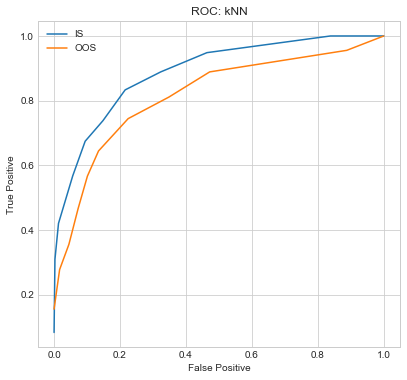

In [42]:
np.random.seed(42)
version = 7
scale = 'some'
modelKNN = mdl.KNN(scale=scale, n_neighbors=10, weights='uniform')
modelKNN.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelKNN.printPlotSummary()
submission = modelKNN.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}_{}.csv".format(modelKNN.name, version, scale)), index_label='PassengerId')

####KNN CV
- Exactly the same as KNN, as CV selects the same parameter

-- Data pipeline v. 7 --

****** KNN CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.81 / 0.75 (0.02) / 0.79

logproba	 (IS / CV / OOS): -0.40 / -1.73 (0.88) / -0.94

aucproba	 (IS / CV / OOS): 0.89 / 0.81 (0.03) / 0.82

recall	 (IS / CV / OOS): 0.67 / 0.64 (0.06) / 0.57

precision	 (IS / CV / OOS): 0.83 / 0.72 (0.05) / 0.74

-----Confusion (IS)-----

   0-pred  1-pred
0    0.54    0.06
1    0.13    0.27

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.60    0.07
1    0.15    0.19

-----Best CV Parameters-----

n_neighbors = 10.00

...with the score = 0.77   | avg = 0.77, std = 0.00

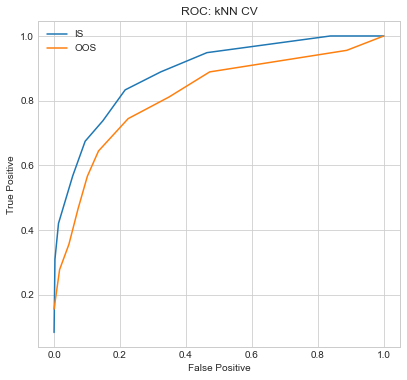

In [6]:
np.random.seed(42)
version = 7
modelKNNCV = mdl.genModelCV(mdl.KNN, cv=5, grid={'n_neighbors': (5, 10, 20, 40)})(scale='some', weights='uniform')
modelKNNCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelKNNCV.printPlotSummary()
submission = modelKNNCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelKNNCV.name, version)), index_label='PassengerId')

####CART (Decision Trees)
- Adding synthetic features does not really improve performance
- The features are not scaled for CART, Random Forests and Boosted Trees

-- Data pipeline v. 7 --

****** DECISION TREE ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.82 / 0.80 (0.03) / 0.80

logproba	 (IS / CV / OOS): -0.40 / -0.72 (0.38) / -0.41

aucproba	 (IS / CV / OOS): 0.88 / 0.84 (0.02) / 0.86

recall	 (IS / CV / OOS): 0.86 / 0.81 (0.06) / 0.82

precision	 (IS / CV / OOS): 0.74 / 0.73 (0.05) / 0.67

-----Confusion (IS)-----

   0-pred  1-pred
0    0.48    0.12
1    0.06    0.35

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.14
1    0.06    0.28

-----Feature Importance-----

Pclass        0.09
Age           0.00
SibSp         0.06
Parch         0.00
Fare          0.07
EmbarkedC     0.00
EmbarkedS     0.00
Female        0.62
CabinNan      0.09
AgeNan        0.00
TitleMaster   0.07
TitleMiss     0.00
TitleRare     0.00
dtype: float64

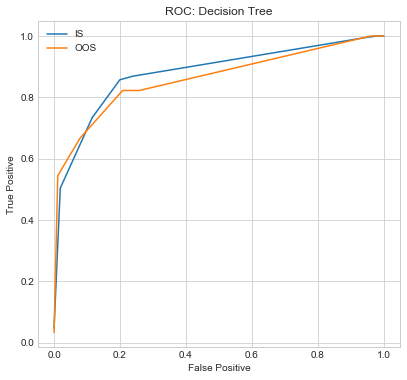

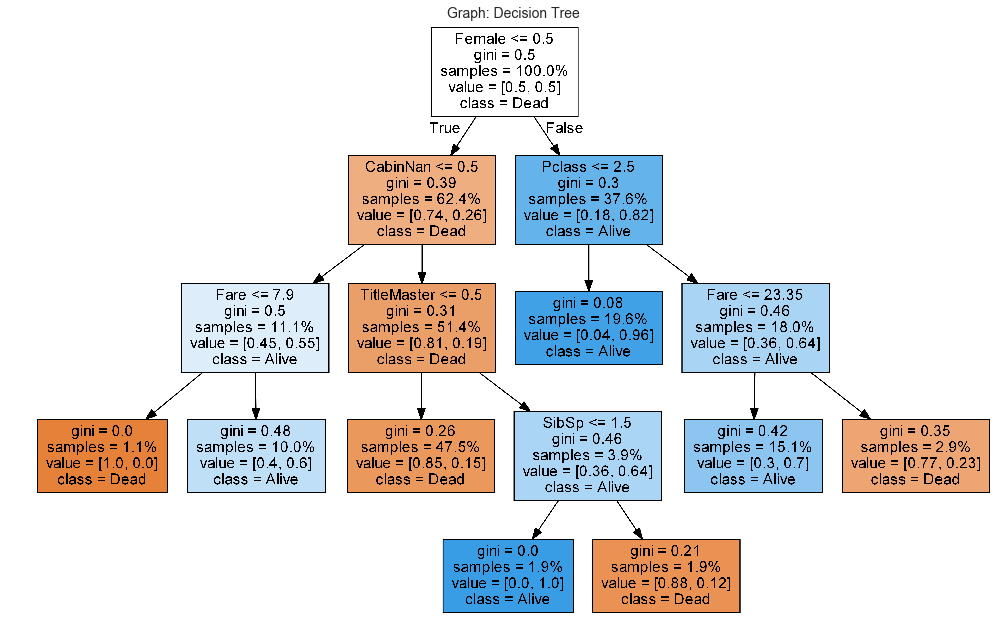

In [7]:
np.random.seed(42)
version = 7
modelTree = mdl.Tree(scale='none', max_leaf_nodes=8, class_weight='balanced')
modelTree.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelTree.printPlotSummary()
submission = modelTree.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelTree.name, version)), index_label='PassengerId')

####CART CV

-- Data pipeline v. 7 --

****** DECISION TREE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.84 / 0.80 (0.03) / 0.80

logproba	 (IS / CV / OOS): -0.39 / -0.72 (0.39) / -0.79

aucproba	 (IS / CV / OOS): 0.89 / 0.84 (0.02) / 0.85

recall	 (IS / CV / OOS): 0.85 / 0.81 (0.06) / 0.79

precision	 (IS / CV / OOS): 0.77 / 0.73 (0.05) / 0.67

-----Confusion (IS)-----

   0-pred  1-pred
0    0.49    0.10
1    0.06    0.35

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.53    0.13
1    0.07    0.26

-----Feature Importance-----

Pclass        0.09
Age           0.02
SibSp         0.06
Parch         0.00
Fare          0.09
EmbarkedC     0.00
EmbarkedS     0.00
Female        0.59
CabinNan      0.09
AgeNan        0.00
TitleMaster   0.07
TitleMiss     0.00
TitleRare     0.00
dtype: float64

-----Best CV Parameters-----

max_leaf_nodes = 12.00

...with the score = 0.80   | avg = 0.79, std = 0.01

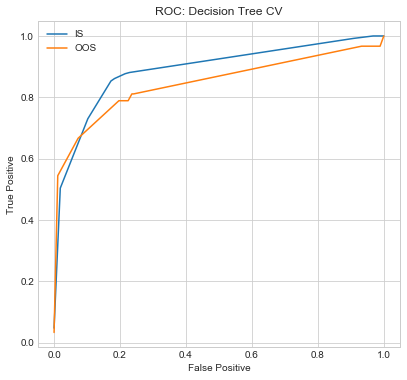

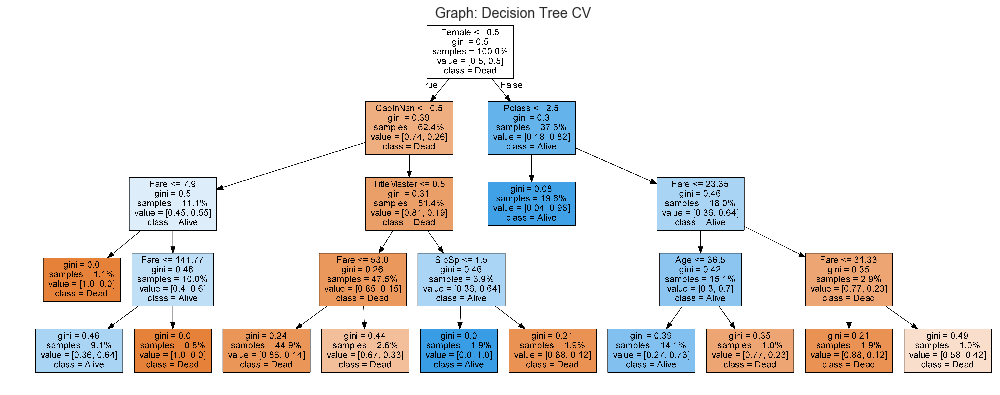

In [8]:
version = 7
modelTreeCV = mdl.genModelCV(mdl.Tree, cv=5, grid={'max_leaf_nodes': (4, 8, 12, 16)})(scale='none', class_weight='balanced')
modelTreeCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelTreeCV.printPlotSummary()
submission = modelTreeCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(modelTreeCV.name, version)), index_label='PassengerId')

####Random Forests
- Important features: Female, Fare, Age, Pclass, CabinNan, SibSp
- Age seems to be more important for trees than for linear and local linear classifiers

-- Data pipeline v. 7 --

****** RANDOM FOREST ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Train Survived Rate (True / Predicted): 0.40 / 0.36

Test Survived Rate (True / Predicted): 0.34 / 0.29

-----Performance-----

accuracy	 (IS / CV / OOS): 0.88 / 0.81 (0.03) / 0.85

logproba	 (IS / CV / OOS): -0.34 / -0.43 (0.04) / -0.39

aucproba	 (IS / CV / OOS): 0.93 / 0.86 (0.03) / 0.87

recall	 (IS / CV / OOS): 0.80 / 0.70 (0.02) / 0.70

precision	 (IS / CV / OOS): 0.90 / 0.82 (0.06) / 0.82

-----Confusion (IS)-----

   0-pred  1-pred
0    0.56    0.04
1    0.08    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.61    0.05
1    0.10    0.24

-----Feature Importance-----

Female        0.50
Age           0.13
Fare          0.12
Pclass        0.11
CabinNan      0.05
SibSp         0.03
TitleMaster   0.02
EmbarkedS     0.02
dtype: float64

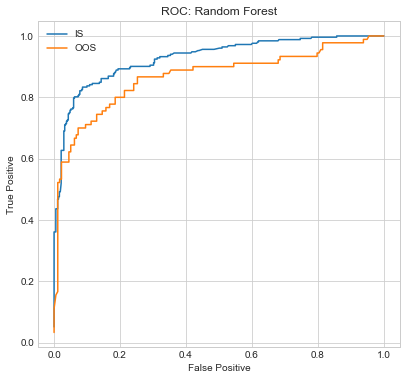

In [63]:
np.random.seed(42)
version = 7
scale = 'none'
class_weight = None
max_leaf_nodes = 16
modelRandomForest = mdl.RandomForest(scale=scale, n_estimators=512, max_features=None,
                                     max_depth=None, max_leaf_nodes=max_leaf_nodes, class_weight=class_weight)
modelRandomForest.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelRandomForest.printPlotSummary()
submission = modelRandomForest.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}_{}_{}_leaf{}.csv".format(
    modelRandomForest.name, version, scale, class_weight, max_leaf_nodes)), index_label='PassengerId')

In [64]:
# --- Summary on Train + Validation I data
modelRandomForest.printPlotSummary()

****** RANDOM FOREST ******


-----Train and Test Sets-----

Sample Size (Train / Test): 891 / 418

Train Survived Rate (True / Predicted): 0.38 / 0.33

Test Survived Rate (True / Predicted): 0.00 / 0.35

-----Performance-----

accuracy	 (IS / CV / OOS): 0.87 / 0.82 (0.03) / nan

logproba	 (IS / CV / OOS): -0.34 / -0.42 (0.05) / nan

aucproba	 (IS / CV / OOS): 0.92 / 0.86 (0.03) / nan

recall	 (IS / CV / OOS): 0.77 / 0.72 (0.06) / nan

precision	 (IS / CV / OOS): 0.89 / 0.80 (0.07) / nan

-----Confusion (IS)-----

   0-pred  1-pred
0    0.58    0.04
1    0.09    0.30

-----Confusion (OOS)-----

  0-pred 1-pred
0    NaN    NaN
1    NaN    NaN

-----Feature Importance-----

Female        0.51
Pclass        0.14
Fare          0.11
Age           0.11
SibSp         0.04
CabinNan      0.04
TitleMaster   0.02
EmbarkedS     0.01
dtype: float64

<TEST OUTCOMES ARE NOT VALID: ROC PLOT IS NOT AVAILABLE>

####Random Forests CV

-- Data pipeline v. 7 --

****** RANDOM FOREST CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Train Survived Rate (True / Predicted): 0.40 / 0.37

Test Survived Rate (True / Predicted): 0.34 / 0.30

-----Performance-----

accuracy	 (IS / CV / OOS): 0.88 / 0.81 (0.03) / 0.84

logproba	 (IS / CV / OOS): -0.34 / -0.44 (0.06) / -0.39

aucproba	 (IS / CV / OOS): 0.93 / 0.87 (0.02) / 0.87

recall	 (IS / CV / OOS): 0.80 / 0.69 (0.02) / 0.71

precision	 (IS / CV / OOS): 0.88 / 0.81 (0.05) / 0.80

-----Confusion (IS)-----

   0-pred  1-pred
0    0.55    0.04
1    0.08    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.60    0.06
1    0.10    0.24

-----Feature Importance-----

Female        0.51
Age           0.12
Fare          0.12
Pclass        0.11
CabinNan      0.05
SibSp         0.03
TitleMaster   0.02
EmbarkedS     0.02
dtype: float64

-----Best CV Parameters-----

max_leaf_nodes = 16.00

...with the score = 0.82   | avg = 0.81, std = 0.01

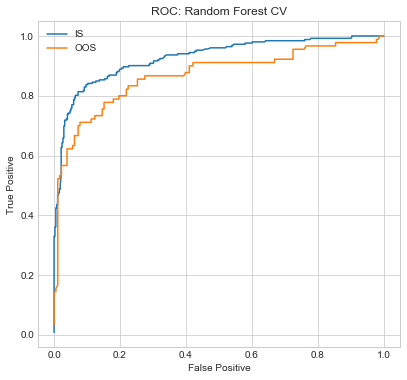

In [57]:
np.random.seed(42)
version = 7
class_weight = None
modelTreeCV = mdl.genModelCV(mdl.RandomForest, cv=5, grid={'max_leaf_nodes': (8, 16, 32, 64)})\
    (scale='none', n_estimators=512, max_features=None, max_depth=None, class_weight=class_weight)
modelTreeCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelTreeCV.printPlotSummary()
submission = modelTreeCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}_{}.csv".format(
    modelTreeCV.name, version, class_weight)), index_label='PassengerId')

In [58]:
# --- Summary on Train + Validation I data
modelTreeCV.printPlotSummary()

****** RANDOM FOREST CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 891 / 418

Train Survived Rate (True / Predicted): 0.38 / 0.34

Test Survived Rate (True / Predicted): 0.00 / 0.35

-----Performance-----

accuracy	 (IS / CV / OOS): 0.88 / 0.82 (0.03) / nan

logproba	 (IS / CV / OOS): -0.34 / -0.43 (0.07) / nan

aucproba	 (IS / CV / OOS): 0.92 / 0.87 (0.04) / nan

recall	 (IS / CV / OOS): 0.78 / 0.72 (0.07) / nan

precision	 (IS / CV / OOS): 0.89 / 0.80 (0.07) / nan

-----Confusion (IS)-----

   0-pred  1-pred
0    0.58    0.04
1    0.09    0.30

-----Confusion (OOS)-----

  0-pred 1-pred
0    NaN    NaN
1    NaN    NaN

-----Feature Importance-----

Female        0.51
Pclass        0.14
Fare          0.11
Age           0.11
SibSp         0.04
CabinNan      0.04
TitleMaster   0.02
EmbarkedS     0.01
dtype: float64

-----Best CV Parameters-----

max_leaf_nodes = 16.00

...with the score = 0.83   | avg = 0.82, std = 0.01

<TEST OUTCOMES ARE NOT VALID: ROC PLOT IS NOT AVAILABLE>

####Boosted Trees
- Important features: Fare, Age, Female, Pclass, SibSp
- The only classifier where Female is not the most important feature
- Fare has a "bump" in the middle, Pclass does not (consistent with Logistic GAM classifier)
- The young have better chances to survive (consistent with the previous findings)

****** BOOSTED TREE ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Train Survived Rate (True / Predicted): 0.40 / 0.38

Test Survived Rate (True / Predicted): 0.34 / 0.29

-----Performance-----

accuracy	 (IS / CV / OOS): 0.91 / 0.81 (0.03) / 0.82

logproba	 (IS / CV / OOS): -0.25 / -0.45 (0.05) / -0.42

aucproba	 (IS / CV / OOS): 0.97 / 0.87 (0.02) / 0.85

recall	 (IS / CV / OOS): 0.85 / 0.72 (0.02) / 0.68

precision	 (IS / CV / OOS): 0.91 / 0.79 (0.05) / 0.77

-----Confusion (IS)-----

   0-pred  1-pred
0    0.56    0.03
1    0.06    0.35

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.60    0.07
1    0.11    0.23

-----Feature Importance-----

Fare          0.36
Age           0.34
Female        0.07
SibSp         0.05
Pclass        0.05
Parch         0.03
TitleMaster   0.02
CabinNan      0.02
EmbarkedS     0.02
TitleRare     0.02
TitleMiss     0.01
dtype: float64

submission_Boosted Tree_v7_None.csv

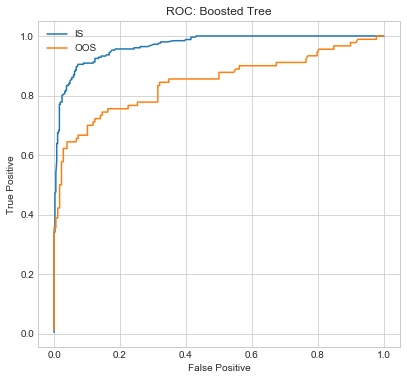

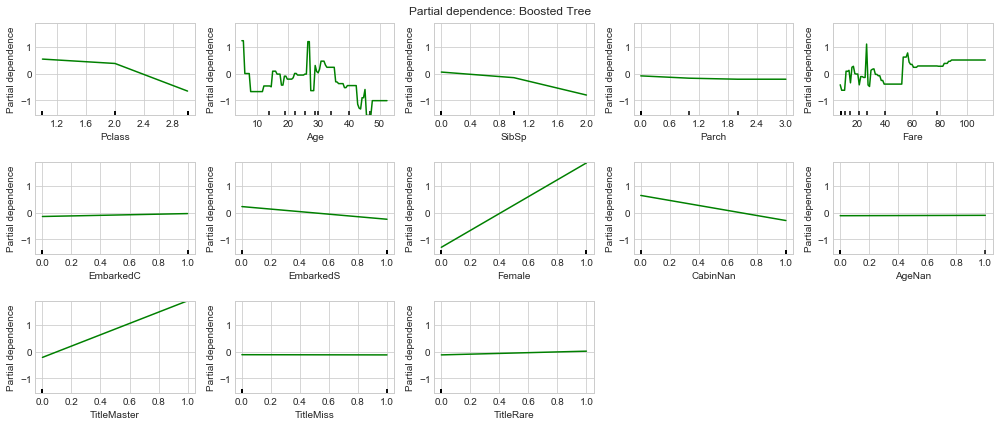

In [18]:
np.random.seed(42)
version = 7
class_weight = None#'balanced'
modelBoostedTree = mdl.BoostedTree(scale='none', n_estimators=256, loss='deviance', learning_rate=0.1, subsample=1.,
                                   max_features=None, max_depth=None, max_leaf_nodes=4, class_weight=class_weight)
modelBoostedTree.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelBoostedTree.printPlotSummary()
submission = modelBoostedTree.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submissionName = "submission_{}_v{}_{}.csv".format(modelBoostedTree.name, version, class_weight)
submission.to_csv(os.path.join(submissionFolder, submissionName), index_label='PassengerId')
print(submissionName)

####Boosted Trees CV
- With a lower learning rate, Fare middle "bump" is less pronounced

****** BOOSTED TREE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Train Survived Rate (True / Predicted): 0.40 / 0.38

Test Survived Rate (True / Predicted): 0.34 / 0.30

-----Performance-----

accuracy	 (IS / CV / OOS): 0.90 / 0.81 (0.04) / 0.82

logproba	 (IS / CV / OOS): -0.28 / -0.44 (0.04) / -0.41

aucproba	 (IS / CV / OOS): 0.96 / 0.87 (0.02) / 0.86

recall	 (IS / CV / OOS): 0.85 / 0.72 (0.05) / 0.69

precision	 (IS / CV / OOS): 0.90 / 0.80 (0.06) / 0.77

-----Confusion (IS)-----

   0-pred  1-pred
0    0.56    0.04
1    0.06    0.34

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.59    0.07
1    0.10    0.23

-----Feature Importance-----

Fare          0.33
Age           0.33
Female        0.10
Pclass        0.05
SibSp         0.05
EmbarkedS     0.03
TitleMaster   0.03
Parch         0.03
CabinNan      0.02
TitleRare     0.02
TitleMiss     0.01
EmbarkedC     0.01
AgeNan        0.00
dtype: float64

-----Best CV Parameters-----

max_leaf_nodes = 4.00

learning_rate = 0.06

subsample = 0.85

...with the score = 0.82   | avg = 0.80, std = 0.01

submission_Boosted Tree CV_v7_None.csv

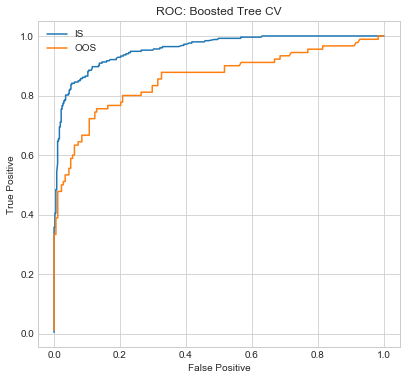

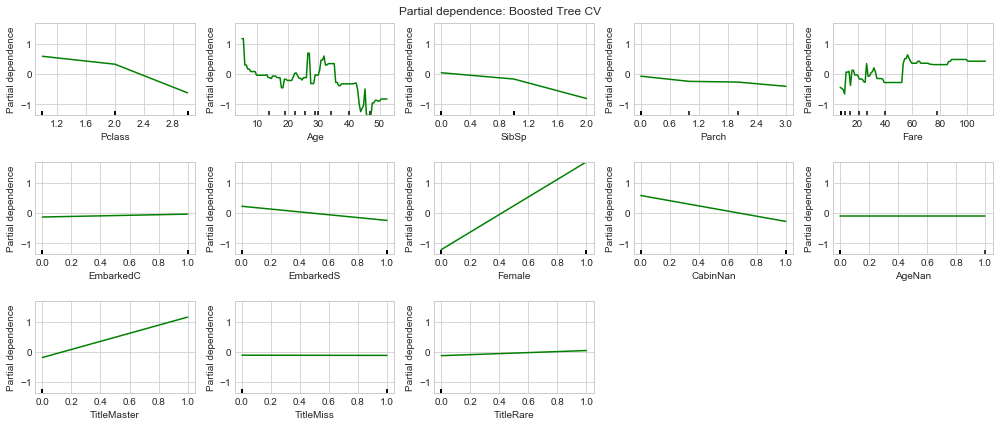

In [14]:
np.random.seed(42)
version = 7
class_weight = None#'balanced'
modelBoostedTreeCV = mdl.genModelCV(mdl.BoostedTree, cv=5, grid={'max_leaf_nodes': (2, 4, 8), 'learning_rate': np.exp2(np.arange(-5, 0, 1)),
                                                            'subsample': [1., 0.85, 0.7]})\
    (scale='none', n_estimators=256, loss='deviance', subsample=1., max_features=None, max_depth=None, class_weight=class_weight)
modelBoostedTreeCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
modelBoostedTreeCV.printPlotSummary()
submission = modelBoostedTreeCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version))
submissionName = "submission_{}_v{}_{}.csv".format(modelBoostedTreeCV.name, version, class_weight)
submission.to_csv(os.path.join(submissionFolder, submissionName), index_label='PassengerId')
print(submissionName)

****** BOOSTED TREE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 891 / 418

Train Survived Rate (True / Predicted): 0.38 / 0.36

Test Survived Rate (True / Predicted): 0.00 / 0.36

-----Performance-----

accuracy	 (IS / CV / OOS): 0.93 / 0.82 (0.03) / nan

logproba	 (IS / CV / OOS): -0.21 / -0.42 (0.06) / nan

aucproba	 (IS / CV / OOS): 0.98 / 0.87 (0.03) / nan

recall	 (IS / CV / OOS): 0.88 / 0.72 (0.07) / nan

precision	 (IS / CV / OOS): 0.94 / 0.79 (0.05) / nan

-----Confusion (IS)-----

   0-pred  1-pred
0    0.59    0.02
1    0.05    0.34

-----Confusion (OOS)-----

  0-pred 1-pred
0    NaN    NaN
1    NaN    NaN

-----Feature Importance-----

Fare          0.37
Age           0.33
Female        0.10
Pclass        0.04
SibSp         0.03
EmbarkedS     0.03
CabinNan      0.02
TitleMiss     0.02
EmbarkedC     0.02
Parch         0.01
TitleMaster   0.01
AgeNan        0.01
TitleRare     0.01
dtype: float64

-----Best CV Parameters-----

max_leaf_nodes = 8.00

learning_rate = 0.06

subsample = 0.70

...with the score = 0.84   | avg = 0.82, std = 0.01

<TEST OUTCOMES ARE NOT VALID: ROC PLOT IS NOT AVAILABLE>

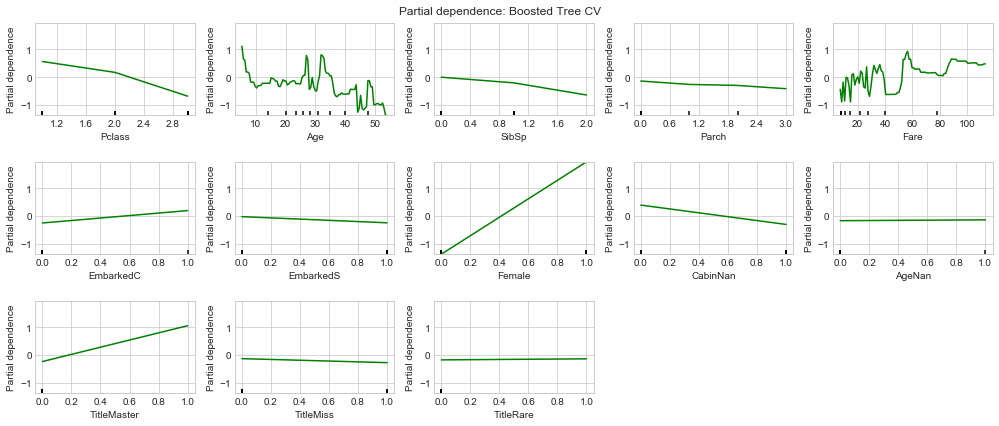

In [15]:
# --- Summary on Train + Validation I data
modelBoostedTreeCV.printPlotSummary()

###Boosted Trees (XGBoost) - UNDER CONSTRUCTION

In [5]:
# modelBoostedTreeXG = mdl.BoostedTreeXGBoost(scale=True, n_estimators=128, loss='deviance', learning_rate=1.,
#                                             max_features=None, max_depth=2, max_leaf_nodes=None, random_state=1,
#                                             balanceWeights=True)
# modelBoostedTreeXG.fit(data)
# modelBoostedTreeXG.predict(dataT)
# modelBoostedTreeXG.printSummary()
# modelBoostedTreeXG.plotROC()


####SVM CV (Polynomial)

-- Data pipeline v. 7 --

****** SVM CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.83 / 0.81 (0.02) / 0.79

logproba	 (IS / CV / OOS): -0.43 / -0.50 (0.03) / -0.48

aucproba	 (IS / CV / OOS): 0.90 / 0.84 (0.02) / 0.84

recall	 (IS / CV / OOS): 0.81 / 0.76 (0.04) / 0.70

precision	 (IS / CV / OOS): 0.78 / 0.77 (0.03) / 0.68

-----Confusion (IS)-----

   0-pred  1-pred
0    0.50    0.09
1    0.08    0.33

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.56    0.11
1    0.10    0.24

-----Best CV Parameters-----

degree = 2.00

gamma = 0.25

...with the score = 0.81   | avg = 0.75, std = 0.06

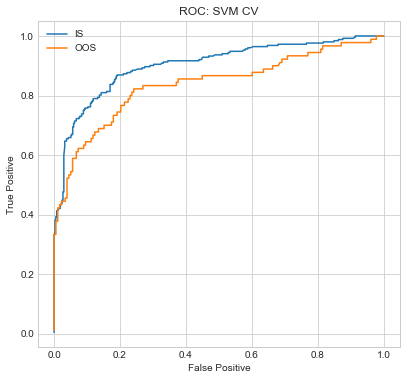

In [10]:
np.random.seed(42)
version = 7
kernel = 'poly'
SVMCV = mdl.genModelCV(mdl.SVM, cv=5, grid={'degree': (2, 3, 4), 'gamma': np.exp2(np.arange(-5, 0, 1))})\
    (scale='some', kernel=kernel, class_weight='balanced')
SVMCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
SVMCV.printPlotSummary()
submission = SVMCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}_{}.csv".format(SVMCV.name, version, 
                                                                                   kernel)), index_label='PassengerId')


####SVM CV (Radial)

-- Data pipeline v. 7 --

****** SVM CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.83 / 0.79 (0.03) / 0.82

logproba	 (IS / CV / OOS): -0.46 / -0.50 (0.03) / -0.48

aucproba	 (IS / CV / OOS): 0.88 / 0.85 (0.03) / 0.84

recall	 (IS / CV / OOS): 0.81 / 0.78 (0.04) / 0.73

precision	 (IS / CV / OOS): 0.79 / 0.73 (0.05) / 0.73

-----Confusion (IS)-----

   0-pred  1-pred
0    0.51    0.09
1    0.08    0.33

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.57    0.09
1    0.09    0.25

-----Best CV Parameters-----

gamma = 0.06

...with the score = 0.81   | avg = 0.79, std = 0.01

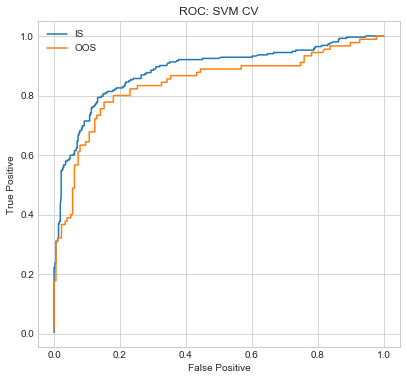

In [7]:
np.random.seed(42)
version = 7
kernel = 'rbf'
SVMRadialCV = mdl.genModelCV(mdl.SVM, cv=5, grid={'gamma': np.exp2(np.arange(-7, 0, 1))})\
    (scale='some', kernel=kernel, class_weight='balanced')
SVMRadialCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
SVMRadialCV.printPlotSummary()
submission = SVMRadialCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
                                                                         verbose=False))
submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}_{}.csv".format(SVMRadialCV.name, version, 
                                                                                   kernel)), index_label='PassengerId')


### Model Stacking & Selection

#### Base classifiers
- Several sets of base classifiers:
	- Classifiers with parameters previously selected by CV (see the tests above)
	- Classifiers with parameters to be selected by CV here during fitting
	- An extended set of classifiers, including same classifiers with different parameters
- Scale = 'none', as the features will be scaled by the Voting classifier

In [27]:
cv = 5
# base_class_weight = 'balanced'
base_class_weight = None
# -- Base classifiers with parameters chosen by CV previously
BaseLR = mdl.Logistic(fit_intercept=False, scale='none', C=10)
BaseKNN = mdl.KNN(scale='none', n_neighbors=10, weights='uniform')
BaseBoostedTree = mdl.BoostedTree(scale='none', n_estimators=256, loss='deviance', class_weight=base_class_weight,
                                  learning_rate=0.06, subsample=1., max_leaf_nodes=4)
BaseRandomForest = mdl.RandomForest(scale='none', n_estimators=512, max_features=None,
                                    max_leaf_nodes=16, class_weight=base_class_weight)
BaseSVM = mdl.SVM(scale='none', C=1., kernel='poly', degree=2, gamma=0.25, class_weight=base_class_weight)
BaseLinearLocal = mdl.LogisticLinearLocal(scale='none', reg_type='ll', bw=4.)
BaseModels = (('Logistic', BaseLR), ('KNN', BaseKNN), ('BoostedTree', BaseBoostedTree),
              ('RandomForest', BaseRandomForest), ('SVM', BaseSVM), ('LinearLocal', BaseLinearLocal))

# -- Base CV classifiers
BaseKNNCV = mdl.genModelCV(mdl.KNN, cv=cv, grid={'n_neighbors': [5, 10, 20]})(scale='none', weights='uniform')
BaseBoostedTreeCV = mdl.genModelCV(ModelClass=mdl.BoostedTree, cv=cv,
                                   grid={'learning_rate': [0.12, 0.06], 'subsample': [1., 0.85, 0.7],
                                         'max_leaf_nodes': [4, 8]}) \
    (scale='none', n_estimators=256, loss='deviance', max_features=None, class_weight=base_class_weight)
BaseRandomForestCV = mdl.genModelCV(ModelClass=mdl.RandomForest, cv=cv, grid={'max_leaf_nodes': [8, 16, 32]}) \
    (scale='none', n_estimators=512, max_features=None,
     max_depth=None, max_leaf_nodes=None, class_weight=base_class_weight)
BaseSVMCV = mdl.genModelCV(ModelClass=mdl.SVM, cv=cv, grid={'degree': [2, 4], 'gamma': [0.06, 0.12, 0.25]}) \
    (scale='none', C=1., kernel='poly', class_weight=base_class_weight)
BaseLinearLocalCV = mdl.genModelCV(ModelClass=mdl.LogisticLinearLocal, cv=cv, grid={'bw': [0.5, 1., 2., 4.]}) \
    (scale='none', reg_type='ll')
# BaseGAMCV = mdl.genModelCV(ModelClass=mdl.LogisticGAM, grid={'lam': np.exp2(np.arange(-4, 5, 2))}) \
#     (cv=5, scale=False, fit_intercept=False, n_splines=15)
BaseModelsCV = (('Logistic', BaseLR), ('KNN CV', BaseKNNCV), ('BoostedTree CV', BaseBoostedTreeCV),
                ('RandomForest CV', BaseRandomForestCV), ('SVM CV', BaseSVMCV), ('LinearLocal CV', BaseLinearLocalCV))

# -- Extended set of base classifiers
BaseModelsExt = [['Logistic', mdl.Logistic(fit_intercept=False, scale='none', C=10)]]
for i, j in itertools.product([5, 10, 20], ['uniform']):
    BaseModelsExt += [['KNN_{}_{}'.format(i, j), mdl.KNN(scale='none', n_neighbors=i, weights=j)]]
for i, j, k in itertools.product([0.12, 0.06], [1., 0.85, 0.7], [4, 8]):
    BaseModelsExt += [['BoostedTree_learn{}_sub{}_leaf{}'.format(i, j, k),
                       mdl.BoostedTree(scale='none', n_estimators=256, loss='deviance', learning_rate=i, subsample=j,
                                       max_features=None, max_depth=None, max_leaf_nodes=k, class_weight=base_class_weight)]]
for i in [8, 16, 32]:
    BaseModelsExt += [['RandomForest_leaf{}'.format(i),
                       mdl.RandomForest(scale='none', n_estimators=512, max_features=None, max_depth=None,
                                        max_leaf_nodes=i, class_weight=base_class_weight)]]
for i, j in itertools.product([2, 4], [0.06, 0.12, 0.25]):
    BaseModelsExt += [['SVM_degree{}_gamma{}'.format(i, j),
                       mdl.SVM(scale='none', C=1., kernel='poly', degree=i, gamma=j, class_weight=base_class_weight)]]
for i in [0.5, 1., 2., 4.]:
    BaseModelsExt += [['LinearLocal_bw{}'.format(i),
                    mdl.LogisticLinearLocal(scale='none', reg_type='ll', bw=i)]]
    
BaseModelsSets = {'BaseModels': BaseModels, 'BaseModelsCV': BaseModelsCV, 'BaseModelsExt': BaseModelsExt}

#### Model Selection

-- Data pipeline v. 7 --

****** VOTE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.84 / 0.82 (0.04) / 0.82

logproba	 (IS / CV / OOS): -0.51 / -0.48 (0.04) / -0.52

aucproba	 (IS / CV / OOS): 0.89 / 0.86 (0.02) / 0.84

recall	 (IS / CV / OOS): 0.77 / 0.75 (0.05) / 0.68

precision	 (IS / CV / OOS): 0.82 / 0.79 (0.06) / 0.75

-----Confusion (IS)-----

   0-pred  1-pred
0    0.52    0.07
1    0.09    0.31

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.59    0.07
1    0.11    0.23

-----Best CV Parameters-----

-----Weights-----

LinearLocal = 1.00

...with the score = 0.83   | avg = 0.81, std = 0.02

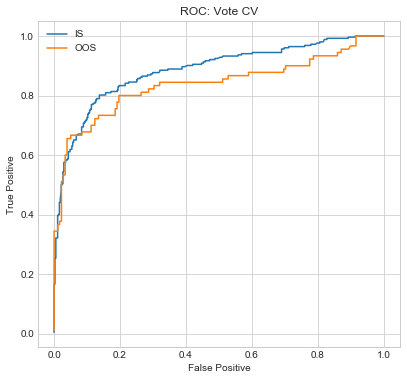

In [8]:
np.random.seed(42)
baseSet = 'BaseModels'
voting = 'soft'
weightsGrid = utmdl.weightsGrid(n=len(BaseModels), step=1)
version = 7
ModelVoteSelect = mdl.VoteCV(weightsCv=5, scale='some', Models=BaseModelsSets[baseSet],
                             voting=voting, weightsGrid=weightsGrid, baseClassifiersInfo=False)
ModelVoteSelect.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
ModelVoteSelect.printPlotSummary()
# submission = BoostedTreeCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version, 
#                                                                          verbose=False))
# submission.to_csv(os.path.join(submissionFolder, "submission_{}_v{}.csv".format(BoostedTreeCV.name, version)), index_label='PassengerId')


#### Model Stacking Equal Weights

****** VOTE ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Train Survived Rate (True / Predicted): 0.40 / 0.37

Test Survived Rate (True / Predicted): 0.34 / 0.28

-----Performance-----

accuracy	 (IS / CV / OOS): 0.86 / 0.83 (0.03) / 0.83

logproba	 (IS / CV / OOS): -0.38 / -0.44 (0.03) / -0.42

aucproba	 (IS / CV / OOS): 0.92 / 0.88 (0.02) / 0.86

recall	 (IS / CV / OOS): 0.79 / 0.74 (0.02) / 0.67

precision	 (IS / CV / OOS): 0.86 / 0.82 (0.06) / 0.79

-----Confusion (IS)-----

   0-pred  1-pred
0    0.54    0.05
1    0.09    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.60    0.06
1    0.11    0.22

submission_Vote_v7_None_BaseModels_soft.csv

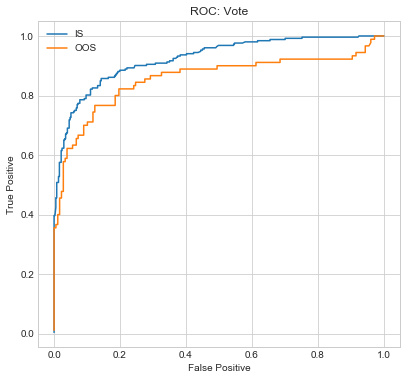

In [31]:
np.random.seed(42)
baseSet = 'BaseModels'
voting = 'soft'
modelWeights = [1. for _ in range(len(BaseModelsSets[baseSet]))]
version = 7
ModelVoteAvg = mdl.Vote(weights=modelWeights, scale='some', Models=BaseModelsSets[baseSet],
                           voting=voting, baseClassifiersInfo=False)
ModelVoteAvg.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
ModelVoteAvg.printPlotSummary()
submission = ModelVoteAvg.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version))
submissionName = "submission_{}_v{}_{}_{}_{}.csv".format(ModelVoteAvg.name, version, base_class_weight, 
                                                            baseSet, voting)
submission.to_csv(os.path.join(submissionFolder, submissionName), index_label='PassengerId')
print(submissionName)

#### Model Stacking CV

-- Data pipeline v. 7 --

****** VOTE CV ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Survived Rate (Train / Test): 0.40 / 0.34

-----Performance-----

accuracy	 (IS / CV / OOS): 0.85 / 0.84 (0.04) / 0.83

logproba	 (IS / CV / OOS): -0.47 / -0.45 (0.02) / -0.49

aucproba	 (IS / CV / OOS): 0.90 / 0.88 (0.01) / 0.85

recall	 (IS / CV / OOS): 0.80 / 0.79 (0.04) / 0.70

precision	 (IS / CV / OOS): 0.82 / 0.81 (0.06) / 0.78

-----Confusion (IS)-----

   0-pred  1-pred
0    0.52    0.07
1    0.08    0.32

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.60    0.07
1    0.10    0.24

-----Best CV Parameters-----

-----Weights-----

LinearLocal = 0.80

Logistic = 0.10

BoostedTree = 0.10

...with the score = 0.84   | avg = 0.82, std = 0.01

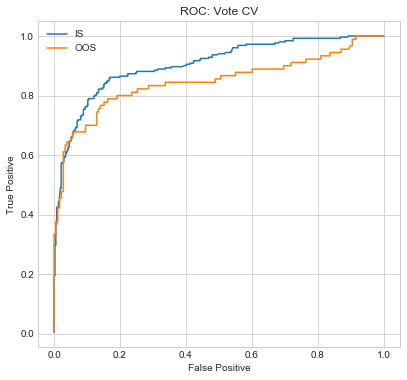

In [14]:
np.random.seed(42)
baseSet = 'BaseModels'
voting = 'soft'
weightsGrid = utmdl.weightsGrid(n=len(BaseModelsCV), step=0.1)
version = 7
ModelVoteCV = mdl.VoteCV(weightsCv=5, scale='some', Models=BaseModelsSets[baseSet],
                             voting=voting, weightsGrid=weightsGrid, baseClassifiersInfo=False)
ModelVoteCV.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
ModelVoteCV.printPlotSummary()
submission = ModelVoteCV.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, version=version))
submissionName = "submission_{}_v{}_{}_{}.csv".format(ModelVoteCV.name, version, baseSet, voting)
submission.to_csv(os.path.join(submissionFolder, submissionName), index_label='PassengerId')
print(submissionName)

#### Model Stacking Regress

****** VOTE REGRESS ******


-----Train and Test Sets-----

Sample Size (Train / Test): 623 / 268

Train Survived Rate (True / Predicted): 0.40 / 0.38

Test Survived Rate (True / Predicted): 0.34 / 0.28

-----Performance-----

accuracy	 (IS / CV / OOS): 0.87 / 0.82 (0.03) / 0.84

logproba	 (IS / CV / OOS): -0.36 / -0.43 (0.03) / -0.41

aucproba	 (IS / CV / OOS): 0.93 / 0.87 (0.02) / 0.86

recall	 (IS / CV / OOS): 0.81 / 0.74 (0.03) / 0.67

precision	 (IS / CV / OOS): 0.87 / 0.81 (0.06) / 0.81

-----Confusion (IS)-----

   0-pred  1-pred
0    0.55    0.05
1    0.08    0.33

-----Confusion (OOS)-----

   0-pred  1-pred
0    0.61    0.05
1    0.11    0.22

-----Weights-----

BoostedTree = 0.36

RandomForest = 0.30

LinearLocal = 0.25

Logistic = 0.19

KNN = 0.01

submission_Vote Regress_v7_None_BaseModels_soft_devianceNormalized.csv

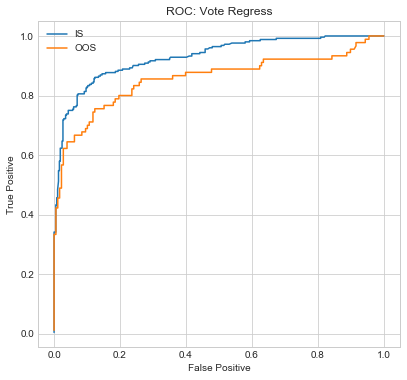

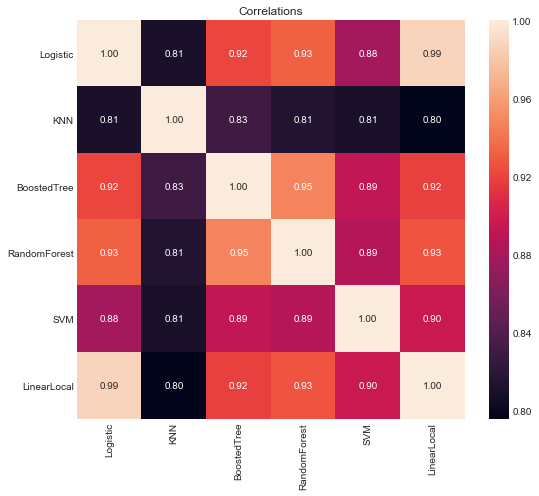

In [10]:
np.random.seed(42)
baseSet = 'BaseModels'
voting = 'soft'
votingLoss = 'devianceNormalized'
version = 7
ModelVoteRegress = mdl.VoteRegress(weightsCv=5, scale='some', Models=BaseModelsSets[baseSet],
                                   voting=voting, loss=votingLoss, baseClassifiersInfo=False)
ModelVoteRegress.fitPredict(*[x for x in dtp.featuresPipelineTrainTest(dataOr, dataTOr, version=version)])
ModelVoteRegress.printPlotSummary()
submission = ModelVoteRegress.fitPredictSubmission(*dtp.featuresPipelineTrainTest(datafinOr, datafinTOr, 
                                                                                  version=version, verbose=False))
submissionName = "submission_{}_v{}_{}_{}_{}_{}.csv".format(ModelVoteRegress.name, version, base_class_weight, 
                                                            baseSet, voting, votingLoss)
submission.to_csv(os.path.join(submissionFolder, submissionName), index_label='PassengerId')
print(submissionName)

****** VOTE REGRESS ******


-----Train and Test Sets-----

Sample Size (Train / Test): 891 / 418

Train Survived Rate (True / Predicted): 0.38 / 0.39

Test Survived Rate (True / Predicted): 0.00 / 0.42

-----Performance-----

accuracy	 (IS / CV / OOS): 0.86 / 0.82 (0.03) / nan

logproba	 (IS / CV / OOS): -0.35 / -0.42 (0.04) / nan

aucproba	 (IS / CV / OOS): 0.93 / 0.87 (0.03) / nan

recall	 (IS / CV / OOS): 0.82 / 0.77 (0.05) / nan

precision	 (IS / CV / OOS): 0.81 / 0.77 (0.06) / nan

-----Confusion (IS)-----

   0-pred  1-pred
0    0.54    0.08
1    0.07    0.32

-----Confusion (OOS)-----

  0-pred 1-pred
0    NaN    NaN
1    NaN    NaN

-----Weights-----

RandomForest = 0.37

BoostedTree = 0.31

Logistic = 0.20

SVM = 0.15

<TEST OUTCOMES ARE NOT VALID: ROC PLOT IS NOT AVAILABLE>

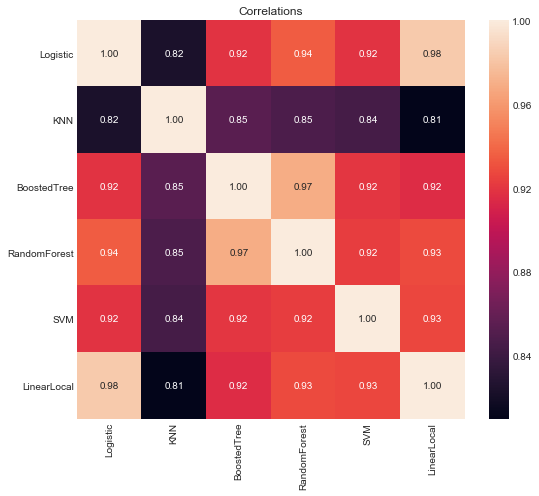

In [72]:
# --- Summary on Train + Validation I data
ModelVoteRegress.printPlotSummary()